In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
# Primeiros 5 
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# TIPO de cada dado da tabela
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Vendo quantos dados estao em falta
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
import numpy as np

In [12]:
df.replace("?", np.nan, inplace = True)
df.head(5)
# vemos que nao tem missing values como ja sabiamos acima

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
missing_data = df.isnull()
missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

 # Confirmando que nao há missing values

car_ID
False    205
Name: car_ID, dtype: int64

symboling
False    205
Name: symboling, dtype: int64

CarName
False    205
Name: CarName, dtype: int64

fueltype
False    205
Name: fueltype, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

doornumber
False    205
Name: doornumber, dtype: int64

carbody
False    205
Name: carbody, dtype: int64

drivewheel
False    205
Name: drivewheel, dtype: int64

enginelocation
False    205
Name: enginelocation, dtype: int64

wheelbase
False    205
Name: wheelbase, dtype: int64

carlength
False    205
Name: carlength, dtype: int64

carwidth
False    205
Name: carwidth, dtype: int64

carheight
False    205
Name: carheight, dtype: int64

curbweight
False    205
Name: curbweight, dtype: int64

enginetype
False    205
Name: enginetype, dtype: int64

cylindernumber
False    205
Name: cylindernumber, dtype: int64

enginesize
False    205
Name: enginesize, dtype: int64

fuelsystem
False    205
Name: fuelsystem, dtype: int64

boreratio
Fa

In [14]:
# Quantidade de car id
df["car_ID"].value_counts().sum()

205

In [16]:
# Descriptive Statistics
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [17]:
data_wheels_counts = df["drivewheel"].value_counts()
print(data_wheels_counts)

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


Fazendo algumas análises

Prevendo o preço do carro baseado no seu tamanho do motor

Text(0, 0.5, 'price')

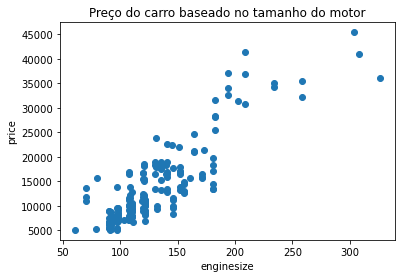

In [18]:
x = df["enginesize"]
y = df["price"]
plt.scatter(x,y)

plt.title("Preço do carro baseado no tamanho do motor")
plt.xlabel("enginesize")
plt.ylabel("price")

# nota-se que quanto maior o tamanho do motor, maior o preço do carro

In [19]:
# Grouping Data
df_test = df[["drivewheel", "carbody", "price"]]
df_grp = df_test.groupby(["drivewheel", "carbody"],as_index = False).mean()
df_grp

,drivewheel,carbody,price
0,4wd,hatchback,12731.083500
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9780.385965
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [20]:
df_pivot = df_grp.pivot(index= "drivewheel", columns="carbody")
df_pivot

price                                                        
carbody    convertible       hardtop     hatchback         sedan         wagon
drivewheel                                                                    
4wd                NaN           NaN  12731.083500  12647.333333   9095.750000
fwd            11595.0   8249.000000   8396.387755   9780.385965   9997.333333
rwd            23949.6  24202.714286  15235.815789  21711.833333  16994.222222

Correlaçao

(0.0, 53193.44575181865)

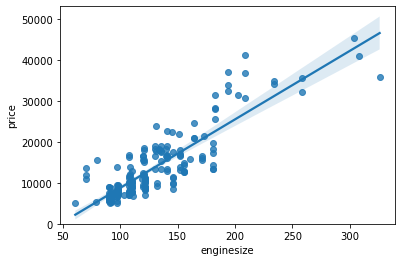

In [21]:
# Correlacao entre dois atributos
sns.regplot(x="enginesize", y="price", data=df)
plt.ylim(0,)

(0.0, 48154.891804871746)

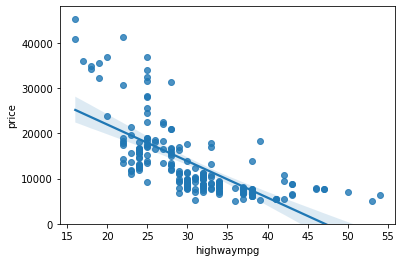

In [22]:
# Outra correlacao entre dois atributos
sns.regplot(x="highwaympg", y="price", data=df)
plt.ylim(0,)

In [23]:
# Vendo a correlaçao
df[['enginesize','highwaympg','price']].corr()

,enginesize,highwaympg,price
enginesize,1.000000,-0.677470,0.874145
highwaympg,-0.677470,1.000000,-0.697599
price,0.874145,-0.697599,1.000000


In [24]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.079443
price,0.079443,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

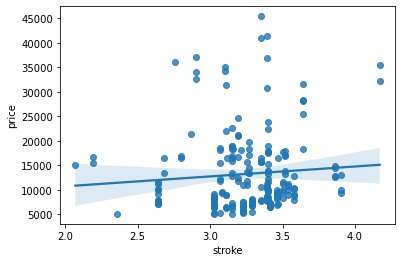

In [25]:
# Visualizando
sns.regplot(x="stroke", y="price", data=df)

## Variaveis categóricas

<AxesSubplot:xlabel='carbody', ylabel='price'>

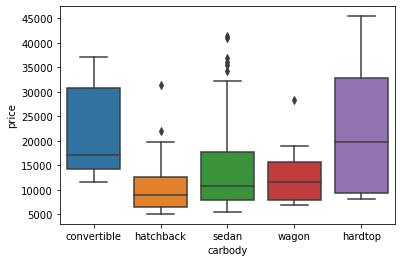

In [26]:

sns.boxplot(x="carbody", y="price", data=df)

<AxesSubplot:xlabel='fueltype', ylabel='price'>

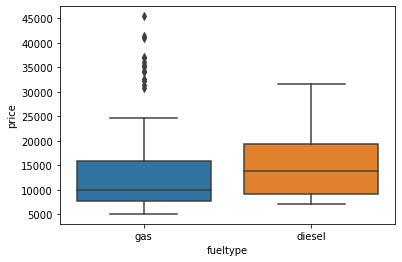

In [27]:
sns.boxplot(x="fueltype", y="price", data=df)

<AxesSubplot:xlabel='enginelocation', ylabel='price'>

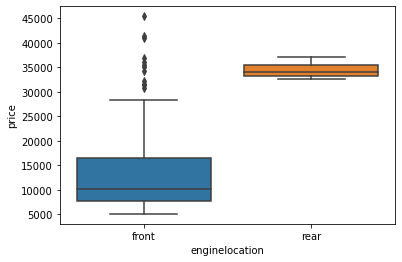

In [28]:
sns.boxplot(x="enginelocation", y="price", data=df)

<AxesSubplot:xlabel='drivewheel', ylabel='price'>

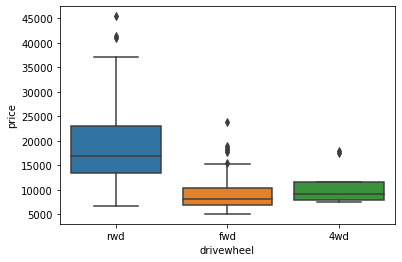

In [29]:
sns.boxplot(x = "drivewheel", y= "price", data=df)

# Machine Learning

In [30]:
# Regressao Linear

lm = LinearRegression()
X = df[["highwaympg"]]
Y= df[["price"]]

lm.fit(X,Y)

# predict
Yhat = lm.predict(X)

Yhat[:5]



array([[16312.47322074],
       [16312.47322074],
       [17121.74674903],
       [13884.65263588],
       [20358.84086218]])

In [31]:
lm.intercept_
print("intercept: ", lm.intercept_)

lm.coef_
print("coef: ", lm.coef_)

intercept:  [38162.85848448]
coef:  [[-809.27352829]]


Métricas

In [32]:
#highwaympg fit
lm.fit(X, Y)
# Encontrando the R^2
print('O R-quadrado é: ', lm.score(X, Y))

O R-quadrado é:  0.48664449266610077


In [33]:
# Calculando o MSE
Yhat = lm.predict(X)
print(' A saida das 4 primeiros valores de previsao é: ', Yhat[0:4])
mse = mean_squared_error(df["price"], Yhat)
print("O ERRO quadrado do da previsao do preço é: ", mse)

 A saida das 4 primeiros valores de previsao é:  [[16312.47322074]
 [16312.47322074]
 [17121.74674903]
 [13884.65263588]]
O ERRO quadrado do da previsao do preço é:  32603432.048684947
